In [28]:
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from census import Census

from config import api_key
c = Census(api_key, year=2019)

In [2]:
#Import cleaned csv
cleandata = "../Resources/Cleaned.csv"

df = pd.read_csv(cleandata)
df.head(25)

,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count
0,0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1
1,1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
2,2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
3,3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
4,4,Edvard,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
5,5,Das Loft,2019,48.212720,16.379310,Wien,Austria,1020,Modern cuisine,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
6,6,Pramerl & the Wolf,2019,48.209450,16.371740,Wien,Austria,1090,Creative,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
7,7,Walter Bauer,2019,48.209230,16.376720,Wien,Austria,1010,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
8,8,SHIKI,2019,48.204067,16.370980,Wien,Austria,1010,Japanese,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
9,9,Tian,2019,48.205130,16.374560,Wien,Austria,1010,Vegetarian,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1


In [3]:
df.region.unique()

array(['Austria', 'California', 'Chicago', 'Croatia', 'Czech Republic',
       'Denmark', 'Finland', 'Greece', 'Hong Kong', 'Hungary', 'Macau',
       'Norway', 'New York City', 'Poland', 'Ireland', 'Rio de Janeiro',
       'Sao Paulo', 'South Korea', 'Singapore', 'Sweden', 'Taipei',
       'Thailand', 'Washington DC', 'United Kingdom'], dtype=object)

In [4]:
#Filter down to US locations only
us_df = df.loc[(df['region'] == "California") | (df['region'] == "New York City") | (df['region'] == "Chicago") | (df['region'] == "Washington DC")]
us_df

,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count
12,12,Chez TJ,2019,37.394680,-122.08044,South San Francisco,California,94041,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1
13,13,Protégé,2019,37.427853,-122.14362,South San Francisco,California,94301,Contemporary,$$$,https://guide.michelin.com/us/en/california/so...,1
14,14,Madera,2019,37.420140,-122.21151,San Francisco,California,94025,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1
15,15,The Village Pub,2019,37.428970,-122.25178,San Francisco,California,94062,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1
16,16,Plumed Horse,2019,37.256480,-122.03537,South San Francisco,California,95070,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
681,22,Per Se,2019,40.768280,-73.98292,New York,New York City,10019,Contemporary,$$$$,https://guide.michelin.com/us/en/new-york-stat...,3
682,23,Le Bernardin,2019,40.761770,-73.98223,New York,New York City,10019,Seafood,$$$$,https://guide.michelin.com/us/en/new-york-stat...,3
683,24,Eleven Madison Park,2019,40.741700,-73.98712,New York,New York City,10010,Contemporary,$$$$,https://guide.michelin.com/us/en/new-york-stat...,3
684,25,Chef's Table at Brooklyn Fare,2019,40.688720,-73.98581,New York,New York City,10018,Contemporary,$$$$,https://guide.michelin.com/us/en/new-york-stat...,3


In [5]:
us_df.cuisine.value_counts()

Contemporary     75
Japanese         38
Californian      14
American         10
Italian          10
French            9
Mexican           6
Korean            5
Seafood           5
Fusion            4
Chinese           3
Indian            3
Scandinavian      3
Mediterranean     3
Thai              2
Asian             2
Steakhouse        2
Gastropub         2
Vegetarian        1
Spanish           1
International     1
Austrian          1
Moroccan          1
European          1
Name: cuisine, dtype: int64

In [6]:
us_df.cuisine.unique()

array(['Contemporary', 'Japanese', 'Indian', 'Korean', 'Californian',
       'American', 'International', 'Moroccan', 'Thai', 'Chinese',
       'Fusion', 'Italian', 'French', 'Asian', 'Steakhouse', 'Mexican',
       'Gastropub', 'Austrian', 'Seafood', 'Mediterranean', 'Vegetarian',
       'Spanish', 'Scandinavian', 'European'], dtype=object)

In [7]:
us_df.price.value_counts()

$$$$    134
$$$      49
$$       19
Name: price, dtype: int64

In [8]:
star_df = us_df["Michelin Star Count"].value_counts().reset_index()
star_df.columns= ["Micheline Star", "Count"]
star_df

,Micheline Star,Count
0,1,155
1,2,33
2,3,14


What cuisine types are most popular in Michelin star restaurants?

In [9]:
us_df["cuisine"].unique

<bound method Series.unique of 12     Contemporary
13     Contemporary
14     Contemporary
15     Contemporary
16     Contemporary
           ...     
681    Contemporary
682         Seafood
683    Contemporary
684    Contemporary
689        American
Name: cuisine, Length: 202, dtype: object>

In [10]:
#Find amount of Michelin Star Restaurants by cuisine
cuisine_df = us_df["cuisine"].value_counts().reset_index()
cuisine_df.columns= ["Cuisine", "Count"]
cuisine_df

,Cuisine,Count
0,Contemporary,75
1,Japanese,38
2,Californian,14
3,American,10
4,Italian,10
5,French,9
6,Mexican,6
7,Korean,5
8,Seafood,5
9,Fusion,4


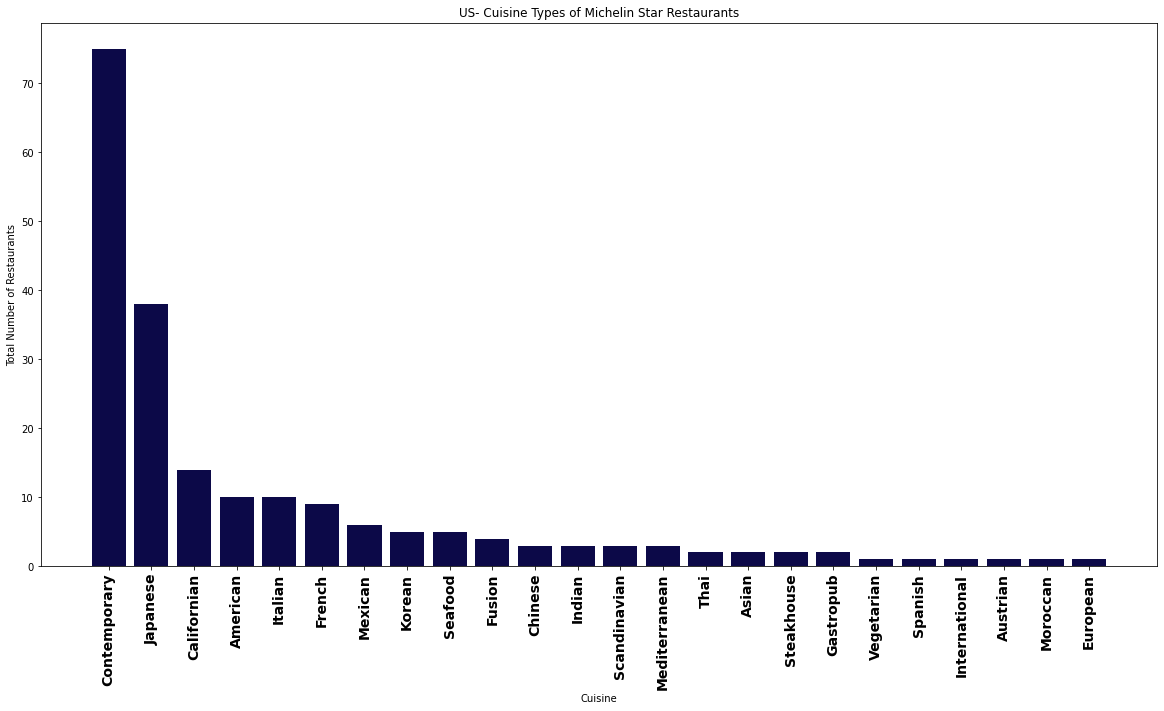

In [11]:
#Graph all Cuisine types b y count
plt.figure(figsize=(20,10))
plt.bar(cuisine_df["Cuisine"], cuisine_df["Count"], color= "#0C0948")
plt.xticks(cuisine_df["Cuisine"], rotation='vertical', fontsize= 14, weight= 'bold')
plt.title("US- Cuisine Types of Michelin Star Restaurants")
plt.xlabel("Cuisine")
plt.ylabel("Total Number of Restaurants")
plt.savefig('us_all_cuisine_chart.png')
plt.show()

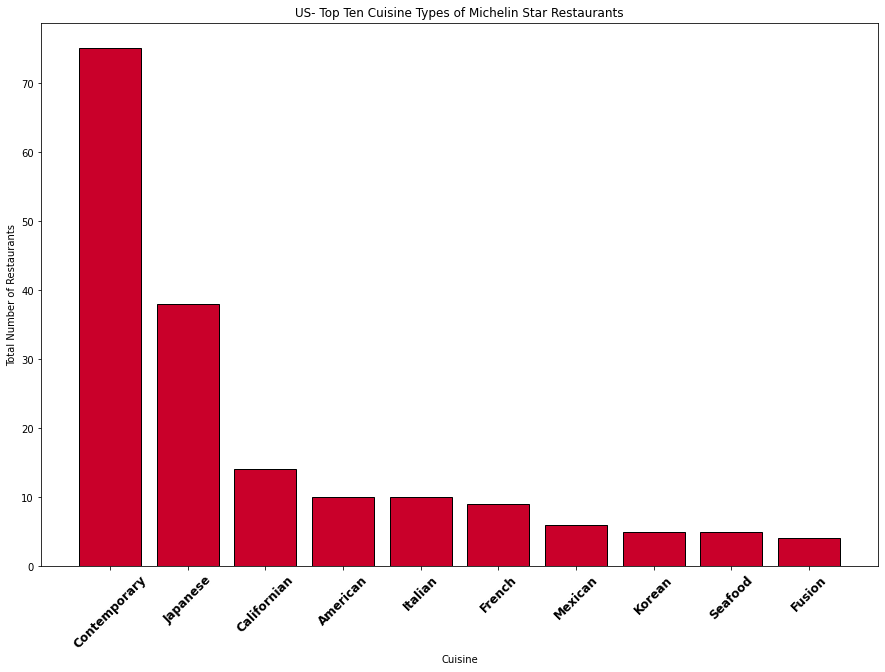

In [26]:
#Graph top ten cuisine types
top_cuisine= cuisine_df.head(10)
plt.figure(figsize=(15,10))
plt.bar(top_cuisine["Cuisine"], top_cuisine["Count"], color= "#C9002A", edgecolor= "black")
plt.xticks(top_cuisine["Cuisine"], rotation= 45, fontsize= 12, weight= "bold")
plt.title("US- Top Ten Cuisine Types of Michelin Star Restaurants")
plt.xlabel("Cuisine")
plt.ylabel("Total Number of Restaurants")
plt.savefig('us_top_ten_cuisine.png')
plt.show()


What proportion of Michelin star restaurants is one versus two versus three star restaurants?


In [17]:
star_df = us_df["Michelin Star Count"].value_counts().reset_index()
star_df.columns= ["Micheline Star", "Count"]
star_df

,Micheline Star,Count
0,1,155
1,2,33
2,3,14


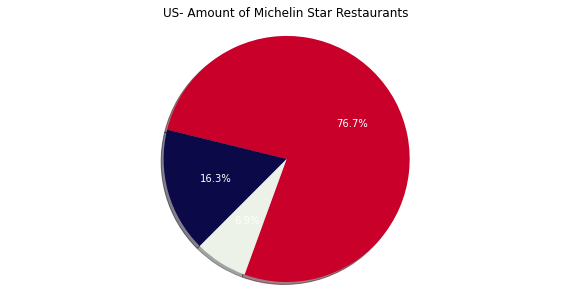

In [24]:
#Pie chart of Michelin Star restaurants globally
plt.figure(figsize=(10,5))
labels = ["One Star", "Two Star", "Three Star"]
colors = ["#C9002A", "#0C0948", "#EDF2E8"]
plt.pie(star_df["Count"], labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250, textprops={'color':"w"})

plt.axis("equal")
plt.title("US- Amount of Michelin Star Restaurants")
plt.savefig('us_star_rating_all_pie.png')
plt.show()

What is the most frequent cuisine style by star rating?

In [19]:
top_cuisine

,Cuisine,Count
0,Contemporary,75
1,Japanese,38
2,Californian,14
3,American,10
4,Italian,10
5,French,9
6,Mexican,6
7,Korean,5
8,Seafood,5
9,Fusion,4


In [19]:
mask= us_df["Michelin Star Count"]==1
one_star = us_df.value_counts(us_df.cuisine.loc[mask]).reset_index()
one_star.columns= ["cuisine", "count"]
one_star_top=one_star.head(10)
one_star_top

,cuisine,count
0,Contemporary,47
1,Japanese,33
2,Californian,13
3,American,9
4,Italian,9
5,French,7
6,Mexican,5
7,Korean,4
8,Fusion,4
9,Mediterranean,3


In [20]:
mask= us_df["Michelin Star Count"]==2
two_star = us_df.value_counts(us_df.cuisine.loc[mask]).reset_index()
two_star.columns= ["cuisine", "count"]
two_star_top=two_star.head(10)
two_star_top

,cuisine,count
0,Contemporary,18
1,Japanese,4
2,French,2
3,Scandinavian,2
4,Seafood,2
5,Californian,1
6,Indian,1
7,Italian,1
8,Korean,1
9,Mexican,1


In [21]:
mask= us_df["Michelin Star Count"]==3
three_star = us_df.value_counts(us_df.cuisine.loc[mask]).reset_index()
three_star.columns= ["cuisine", "count"]
three_star_top=three_star.head(10)
three_star_top

,cuisine,count
0,Contemporary,10
1,American,1
2,Asian,1
3,Japanese,1
4,Seafood,1


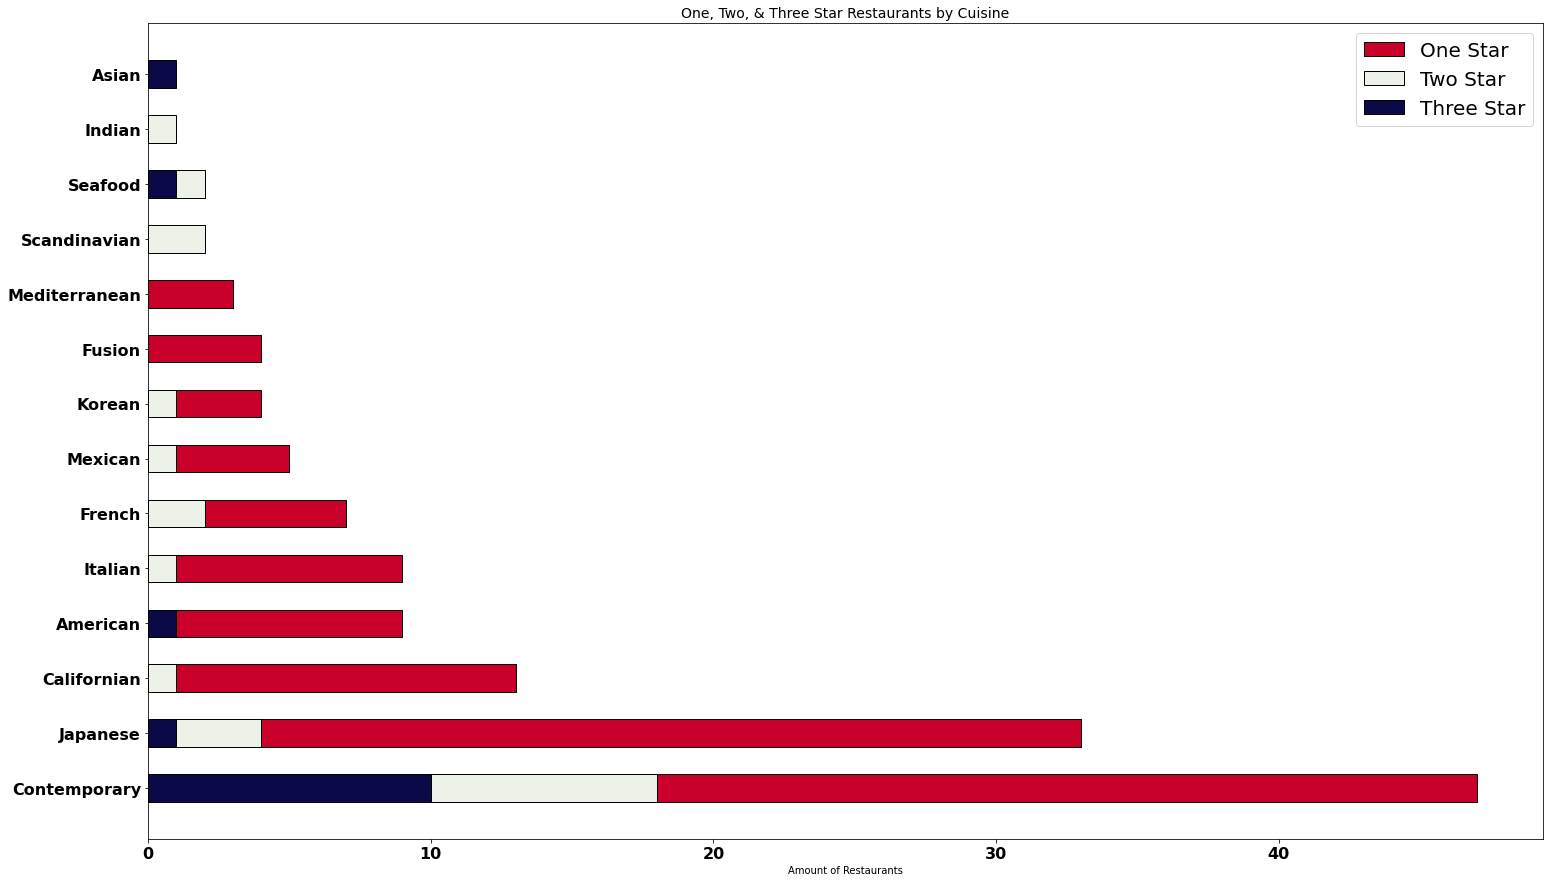

In [22]:
#Stacked Bar Chart
plt.figure(figsize=(25,15))
plt.barh(one_star_top["cuisine"], one_star_top["count"], 0.5, label= "One Star", color= "#C9002A",  edgecolor= "black" )
plt.barh(two_star_top["cuisine"], two_star_top["count"], 0.5, label= "Two Star", color = "#EDF2E8", edgecolor= "black")
plt.barh(three_star_top["cuisine"], three_star_top["count"], 0.5, label= "Three Star", color= "#0C0948", edgecolor= "black")
plt.xlabel("Amount of Restaurants")
plt.yticks( rotation='horizontal', fontsize= 16, weight= "bold")
plt.xticks( fontsize= 16, weight= "bold")
plt.title("One, Two, & Three Star Restaurants by Cuisine", fontsize= 14)
plt.legend(prop={'size': 20})
plt.savefig('us_star_rating_cuisine_stackedbar.png')
plt.show()


In [29]:
#Import census data
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name",
                                      "zip code tabulation area": "zipCode"})

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)


#Final Dataframe
census_pd = census_pd[["zipCode", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Unemployment Count", "Unemployment Rate"]]

census_pd.head()

,zipCode,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Unemployment Count,Unemployment Rate
0,00601,ZCTA5 00601,17113.0,41.9,14361.0,7493.0,10552.0,1968.0,11.500029
1,00602,ZCTA5 00602,37751.0,42.9,16807.0,9694.0,18653.0,1420.0,3.761490
2,00603,ZCTA5 00603,47081.0,42.1,16049.0,11259.0,23691.0,3197.0,6.790425
3,00606,ZCTA5 00606,6392.0,44.3,12119.0,6093.0,4185.0,169.0,2.643930
4,00610,ZCTA5 00610,26686.0,42.7,19898.0,10572.0,12204.0,1029.0,3.855954


In [30]:
merged_df = pd.merge(us_df, census_pd, on = "zipCode", how = "inner")
merged_df.head()

,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Unemployment Count,Unemployment Rate
0,12,Chez TJ,2019,37.394680,-122.08044,South San Francisco,California,94041,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1,ZCTA5 94041,14572.0,34.6,139818.0,81705.0,815.0,361.0,2.477354
1,13,Protégé,2019,37.427853,-122.14362,South San Francisco,California,94301,Contemporary,$$$,https://guide.michelin.com/us/en/california/so...,1,ZCTA5 94301,16582.0,44.9,159148.0,110423.0,1153.0,357.0,2.152937
2,14,Madera,2019,37.420140,-122.21151,San Francisco,California,94025,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1,ZCTA5 94025,43392.0,38.3,161827.0,85240.0,3103.0,843.0,1.942754
3,15,The Village Pub,2019,37.428970,-122.25178,San Francisco,California,94062,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1,ZCTA5 94062,28423.0,45.0,178480.0,95838.0,1885.0,420.0,1.477677
4,16,Plumed Horse,2019,37.256480,-122.03537,South San Francisco,California,95070,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1,ZCTA5 95070,31196.0,50.2,193617.0,94484.0,1455.0,527.0,1.689319


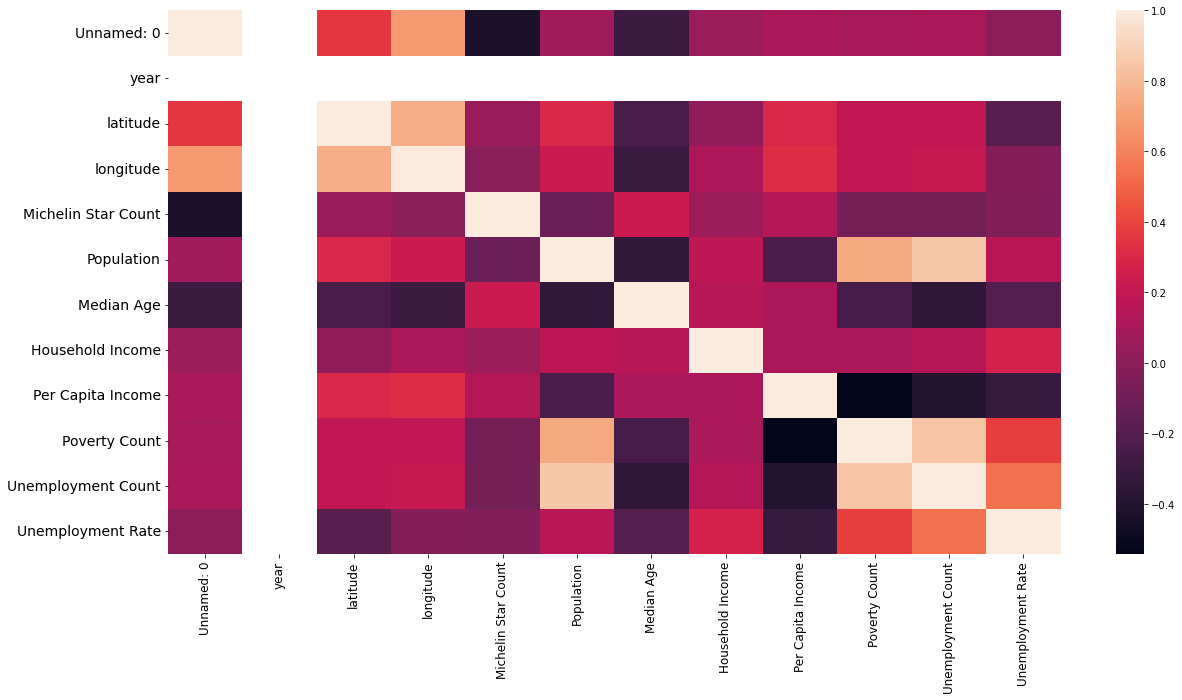

In [36]:

plt.figure(figsize=(20,10))
corrs = merged_df.corr()
sns.heatmap(corrs)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 14)
plt.savefig('heatmap_us.png', bbox_inches = 'tight')
plt.show()

In [32]:
corrs

,Unnamed: 0,year,latitude,longitude,Michelin Star Count,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Unemployment Count,Unemployment Rate
Unnamed: 0,1.000000,NaN,0.351791,0.682879,-0.430954,0.075064,-0.289233,0.058923,0.113373,0.094984,0.106426,0.003983
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.351791,NaN,1.000000,0.756841,0.048978,0.293549,-0.245316,0.018689,0.289358,0.189170,0.198012,-0.187392
longitude,0.682879,NaN,0.756841,1.000000,-0.009144,0.225823,-0.297048,0.119911,0.314843,0.190274,0.212900,-0.028942
Michelin Star Count,-0.430954,NaN,0.048978,-0.009144,1.000000,-0.114707,0.225909,0.055910,0.148932,-0.079978,-0.085200,-0.036098
Population,0.075064,NaN,0.293549,0.225823,-0.114707,1.000000,-0.341210,0.178223,-0.235417,0.733199,0.854857,0.164877
Median Age,-0.289233,NaN,-0.245316,-0.297048,0.225909,-0.341210,1.000000,0.150891,0.116283,-0.261961,-0.352940,-0.204564
Household Income,0.058923,NaN,0.018689,0.119911,0.055910,0.178223,0.150891,1.000000,0.118899,0.106141,0.149985,0.267014
Per Capita Income,0.113373,NaN,0.289358,0.314843,0.148932,-0.235417,0.116283,0.118899,1.000000,-0.542132,-0.395319,-0.310586
Poverty Count,0.094984,NaN,0.189170,0.190274,-0.079978,0.733199,-0.261961,0.106141,-0.542132,1.000000,0.838302,0.379010


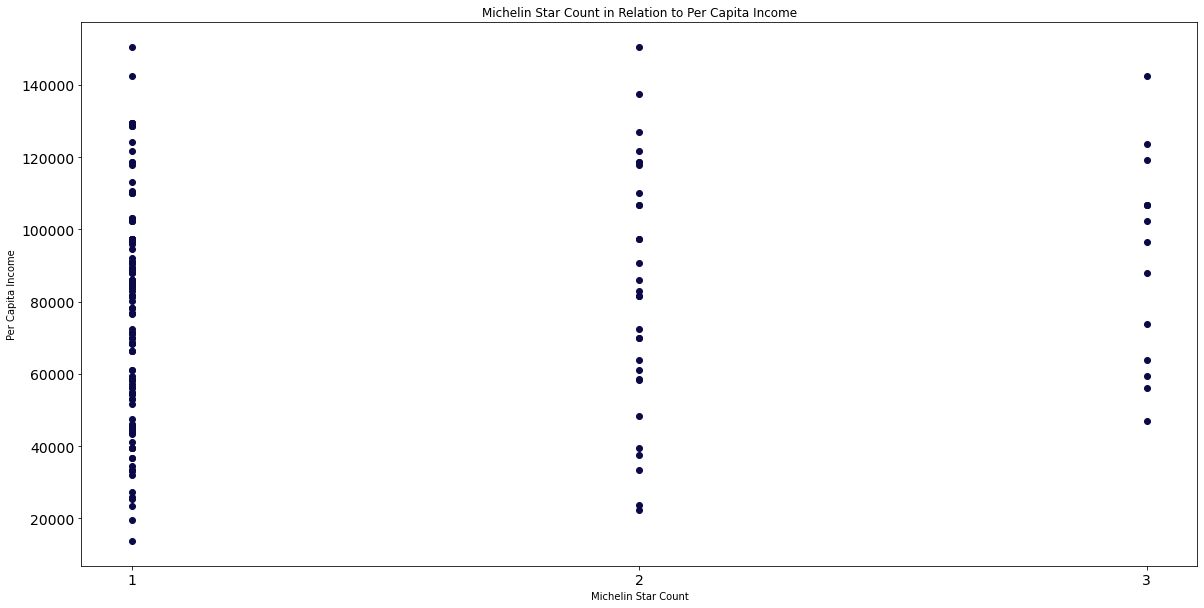

In [37]:
x_values = merged_df["Michelin Star Count"]
y_values = merged_df['Per Capita Income']
plt.figure(figsize= (20,10))
plt.scatter(x_values,y_values, color= "#0C0948")
plt.xticks([1, 2, 3], fontsize= 14)
plt.yticks(fontsize= 14)
plt.xlabel("Michelin Star Count")
plt.ylabel("Per Capita Income")
plt.title("Michelin Star Count in Relation to Per Capita Income")
plt.savefig('msc_pci_scatter_us.png')
plt.show()